## The Objective of This Notebook 
1. explore and visualize the sales data from a supermarket to uncover insights and patterns that can help understand the business performance better
2. Steps
     1.  Import important Libs
     2.  Upload DataSet
     3.  Data Profilling
     4.  Cleaning
     5.  Data Preprocessing 
     6.  Univariate Analysis
     7.  Multivariate Analysis
     8.  Make Conclusions
     9.  Add suggestion decisions

## Import important Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## UpLoad Dataset as DataFrame

In [2]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")

## Data profilling 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
def data_Specs(DS):
    print("Initial Specs on your data =================== \n")
    print("Data Shape: ", DS.shape)
    print("\n---------------------------------------------\n")
    s = (DS.dtypes == 'object')
    Cat_cols = list(s[s].index) 
    print("Category Columns (",len(Cat_cols),") : \n",Cat_cols)
    print("\n---------------------------------------------\n")   
    s = (DS.dtypes != 'object')
    Nums_cols = list(s[s].index) 
    
    print("Numeric Columns (",len(Nums_cols),") : \n",Nums_cols)
    print("\n---------------------------------------------\n")
    print("Null Ratio per Column: \n")
    print(DS.isnull().sum()/len(DS)*100)
    print("\n---------------------------------------------\n")
    print("Summary Statistic for numeric columns: \n")
    print(DS.describe())
    print("\n---------------------------------------------\n")
data_Specs(df)

Initial Specs on your data =================== 

Data Shape:  (1000, 17)

---------------------------------------------

Category Columns ( 9 ) : 
 ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']

---------------------------------------------

Numeric Columns ( 8 ) : 
 ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

---------------------------------------------

Null Ratio per Column: 

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0

In [5]:
sum(df.duplicated())

0

## Cleaning 
***THERE IS NOTHING TO CLEAN***

## Data Preprocessing

In [6]:
# Define satisfaction levels
bins = [1, 4, 6, 8, 10]
labels = ['Very Unsatisfied', 'Unsatisfied', 'Satisfied', 'Very Satisfied']
df['Satisfaction Level'] = pd.cut(df['Rating'], bins=bins, labels=labels, include_lowest=True)

In [7]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.to_period('M')

In [8]:
#Calculate Net Income Columns 
df["Net Income"] = df["gross income"] - df["Tax 5%"]

## Univariate Analysis for Numerical Data

[[<Axes: title={'center': 'Unit price'}>
  <Axes: title={'center': 'Quantity'}> <Axes: title={'center': 'Tax 5%'}>]
 [<Axes: title={'center': 'Total'}> <Axes: title={'center': 'Date'}>
  <Axes: title={'center': 'cogs'}>]
 [<Axes: title={'center': 'gross margin percentage'}>
  <Axes: title={'center': 'gross income'}>
  <Axes: title={'center': 'Rating'}>]
 [<Axes: title={'center': 'Net Income'}> <Axes: > <Axes: >]]


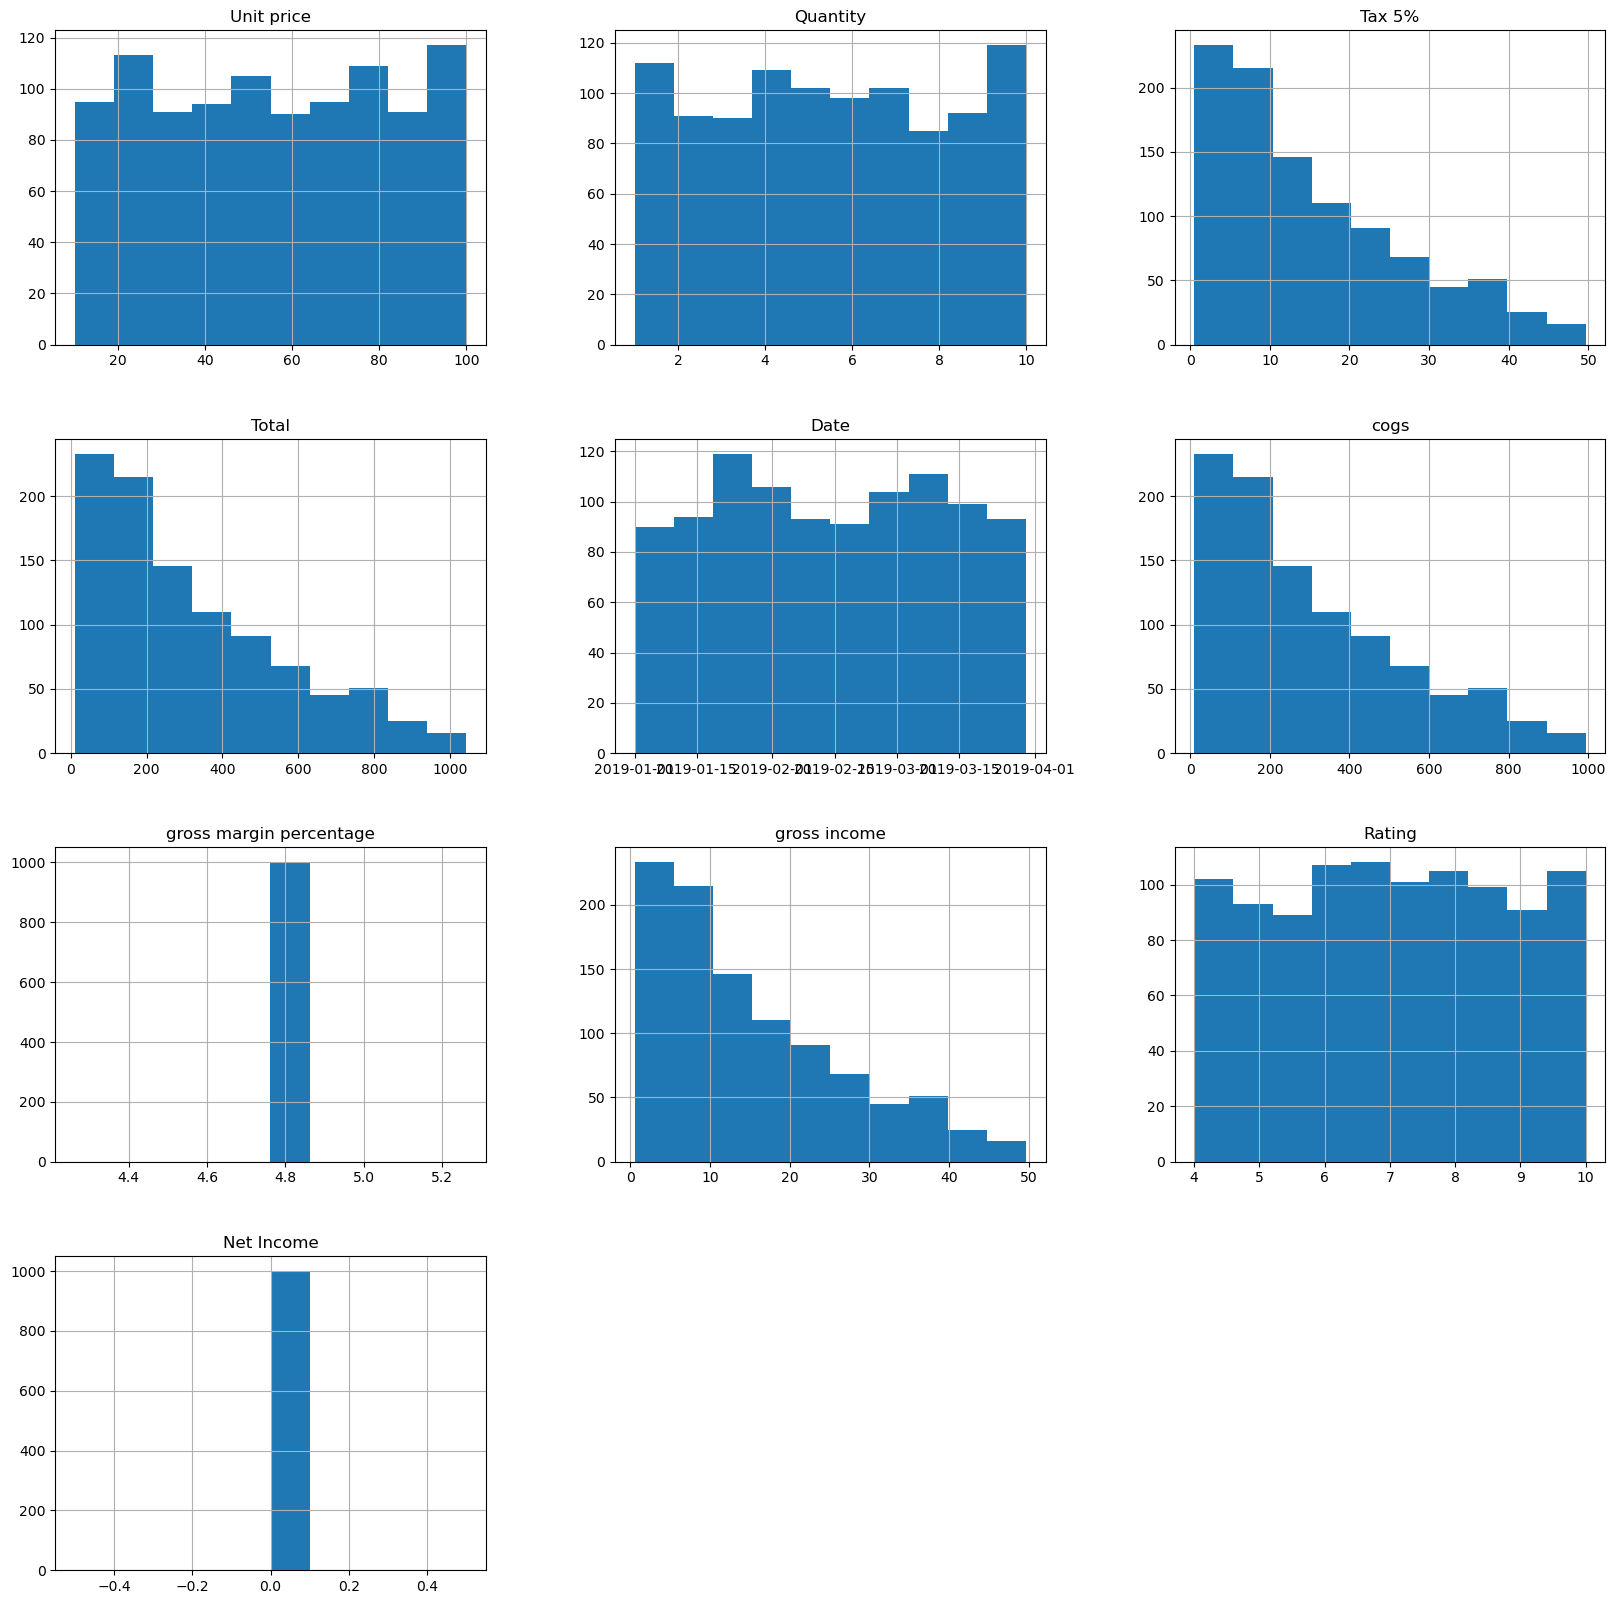

In [9]:
print(df.hist(figsize=(20,20)));

## Univariate Analysis for Categorical Data

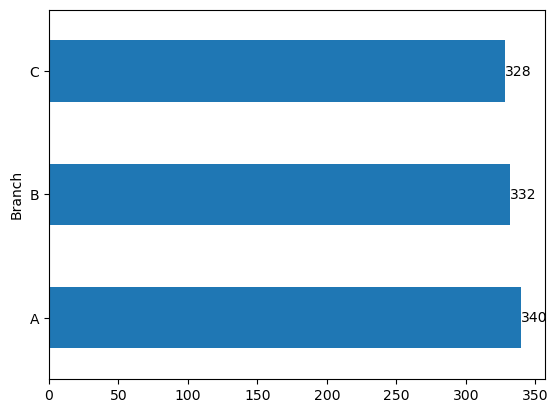

In [10]:
# Assuming 'df' is your DataFrame
ax = df.Branch.value_counts().plot(kind="barh")

# Adding counts on each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Display the plot
plt.show()

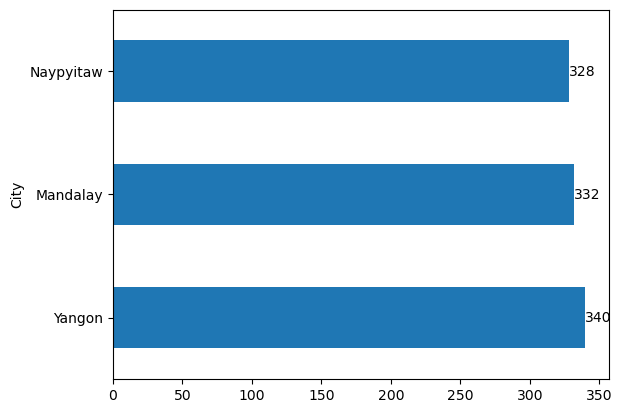

In [11]:

# Assuming 'df' is your DataFrame
ax = df["City"].value_counts().plot(kind="barh")

# Adding counts on each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Display the plot
plt.show()

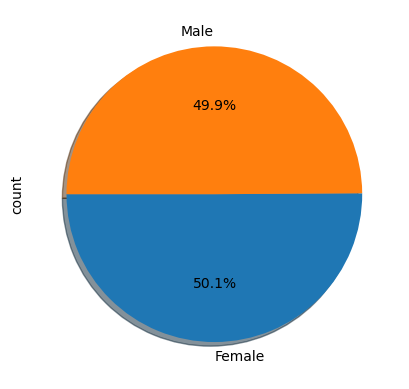

In [12]:
df.Gender.value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=180, shadow=True);

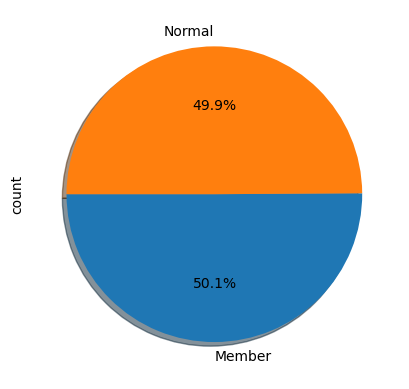

In [13]:
df["Customer type"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=180, shadow=True);

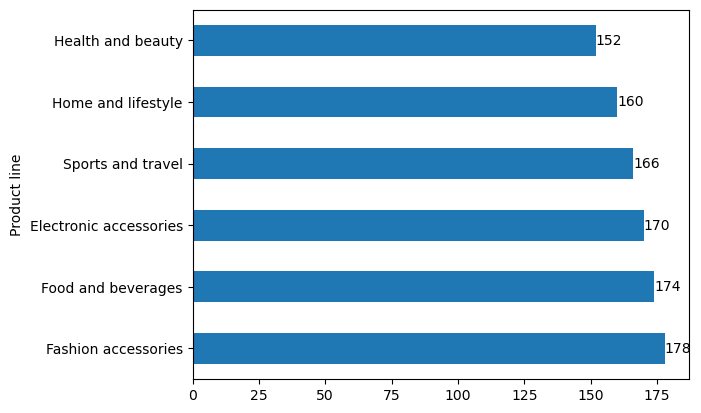

In [14]:
ax=df["Product line"].value_counts().plot(kind="barh")
# Adding counts on each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Display the plot
plt.show()

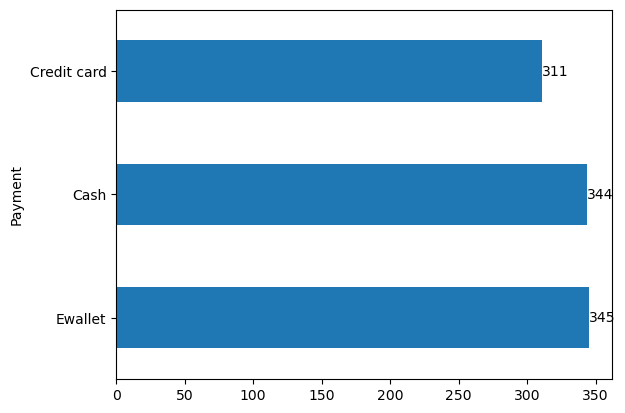

In [15]:
ax=df["Payment"].value_counts().plot(kind="barh")
# Adding counts on each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Display the plot
plt.show()

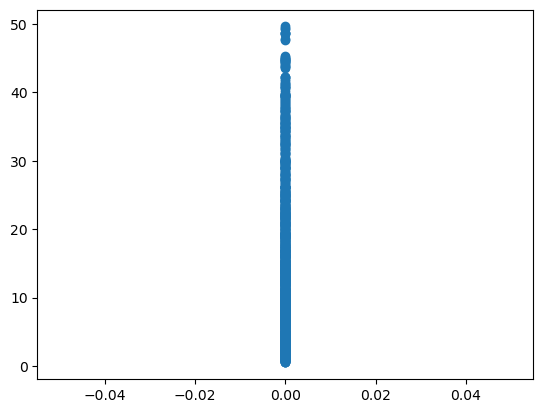

In [16]:
plt.scatter(df["Net Income"], df["Tax 5%"]);

In [18]:
print(df[["Net Income", "Tax 5%"]].corr())

            Net Income  Tax 5%
Net Income         NaN     NaN
Tax 5%             NaN     1.0


In [17]:
print(df.groupby('City')["Product line"].value_counts().sort_values(ascending=False))

City       Product line          
Naypyitaw  Food and beverages        66
Yangon     Home and lifestyle        65
Naypyitaw  Fashion accessories       65
Mandalay   Fashion accessories       62
           Sports and travel         62
Yangon     Electronic accessories    60
           Sports and travel         59
           Food and beverages        58
Mandalay   Electronic accessories    55
Naypyitaw  Electronic accessories    55
Mandalay   Health and beauty         53
Naypyitaw  Health and beauty         52
Yangon     Fashion accessories       51
Mandalay   Home and lifestyle        50
           Food and beverages        50
Yangon     Health and beauty         47
Naypyitaw  Sports and travel         45
           Home and lifestyle        45
Name: count, dtype: int64


In [19]:
result = (df.groupby(["City", "Product line"])["Quantity"].sum().reset_index().sort_values(["City","Quantity"], ascending=[True, False]).drop_duplicates(["City"], keep='first'))

In [20]:
print(result)

         City        Product line  Quantity
5    Mandalay   Sports and travel       322
8   Naypyitaw  Food and beverages       369
16     Yangon  Home and lifestyle       371


In [21]:
result = (df.groupby(["Gender", "Product line"])["Quantity"].sum().reset_index().sort_values(["Gender","Quantity"], ascending=[True, False]).drop_duplicates(["Gender"], keep='first'))

In [22]:
print(result)

   Gender         Product line  Quantity
1  Female  Fashion accessories       530
9    Male    Health and beauty       511


In [23]:
result = (
    df.groupby(["Gender", "Product line"])["Quantity"]
    .sum()
    .reset_index()
    .sort_values(["Gender", "Quantity"], ascending=[True, False])
    .groupby("Gender")
    .head(2)  # Select the top 2 products for each gender
    .reset_index(drop=True)
)

print(result)

   Gender            Product line  Quantity
0  Female     Fashion accessories       530
1  Female      Food and beverages       514
2    Male       Health and beauty       511
3    Male  Electronic accessories       483


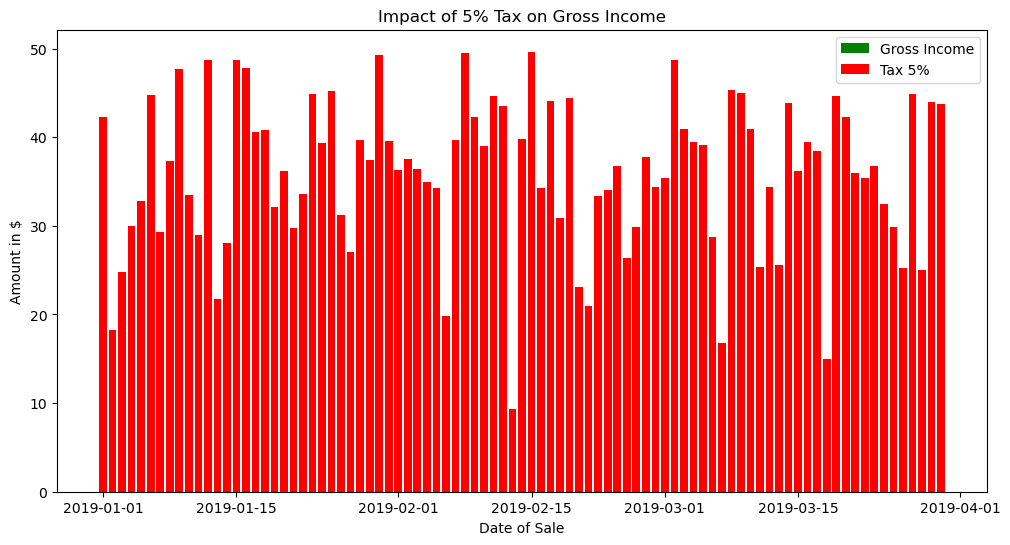

In [24]:
# Ensure Date column is in datetime format
#df['Date'] = pd.to_datetime(df['Date'])

# Visualization 1: How Tax Impacts the Income
plt.figure(figsize=(12, 6))

# Gross Income Bars
plt.bar(df['Date'], df['gross income'], color='green', label='Gross Income')

# Overlay Tax Bars
plt.bar(df['Date'], df['Tax 5%'], color='red', label='Tax 5%')

# Adding Titles and Labels
plt.title('Impact of 5% Tax on Gross Income')
plt.ylabel('Amount in $')
plt.xlabel('Date of Sale')
plt.legend()

# Display the Plot
plt.show()


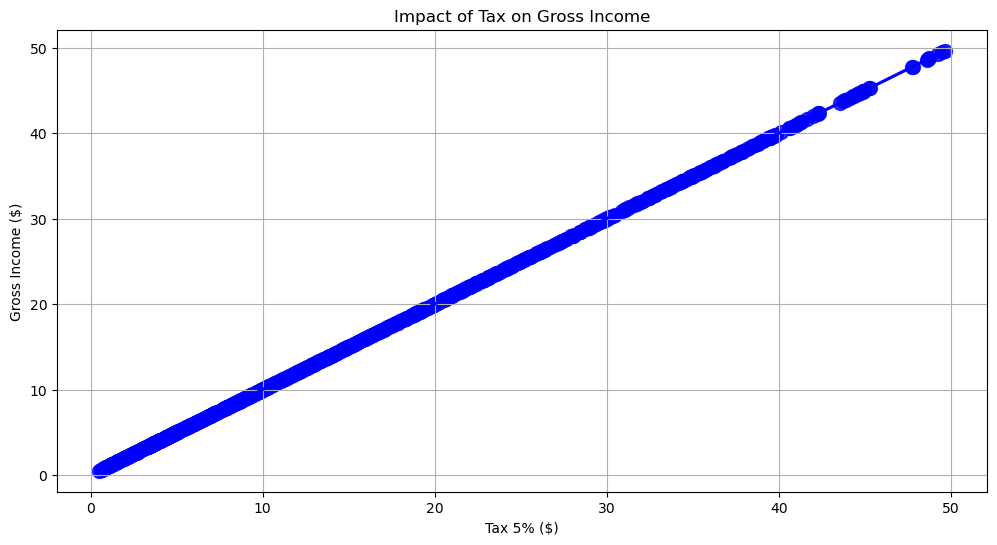

In [25]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Scatter plot with regression line using Seaborn
sns.regplot(x='gross income', y='Tax 5%', data=df, scatter_kws={'s': 100}, color='blue')

# Adding Titles and Labels
plt.title('Impact of Tax on Gross Income')
plt.xlabel('Tax 5% ($)')
plt.ylabel('Gross Income ($)')
plt.grid(True)

# Show the plot
plt.show()

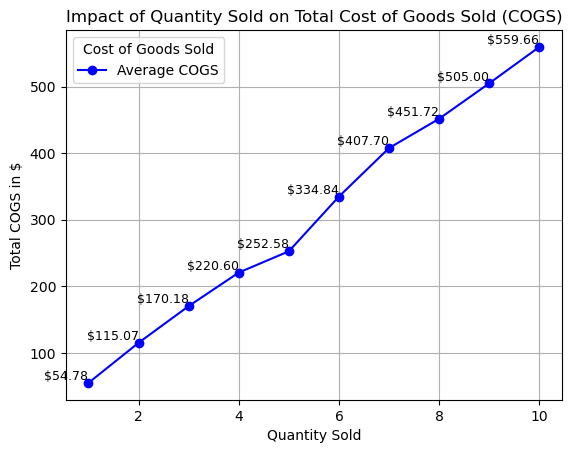

In [26]:
# Aggregate data by quantity to find average COGS per quantity
df_grouped = df.groupby('Quantity').mean(numeric_only=True).reset_index()

# Plotting the line chart
plt.plot(df_grouped['Quantity'], df_grouped['cogs'], marker='o', linestyle='-', color='blue', label='Average COGS')

# Adding Titles and Labels
plt.title('Impact of Quantity Sold on Total Cost of Goods Sold (COGS)')
plt.xlabel('Quantity Sold')
plt.ylabel('Total COGS in $')
plt.grid(True)

# Annotating specific points to highlight trends
for i in range(len(df_grouped)):
    plt.text(df_grouped['Quantity'][i], df_grouped['cogs'][i], f"${df_grouped['cogs'][i]:.2f}", 
             fontsize=9, verticalalignment='bottom', horizontalalignment='right')

# Adding a legend for clarification
plt.legend(title='Cost of Goods Sold')

# Display the Plot
plt.show()

# 1. Distribution of Ratings

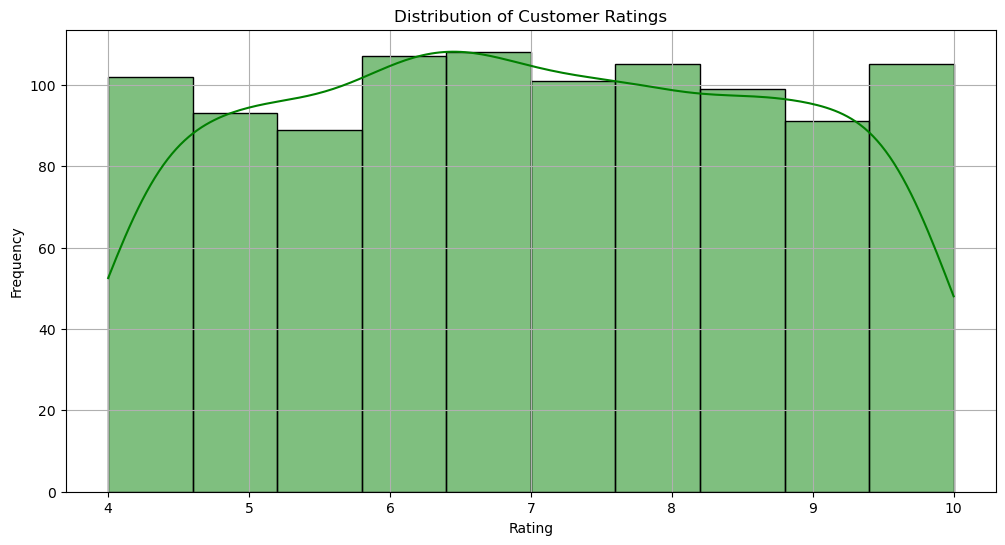

In [27]:

plt.figure(figsize=(12, 6))
sns.histplot(df['Rating'], kde=True, bins=10, color='green')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## 3. Rating vs. Gross Income

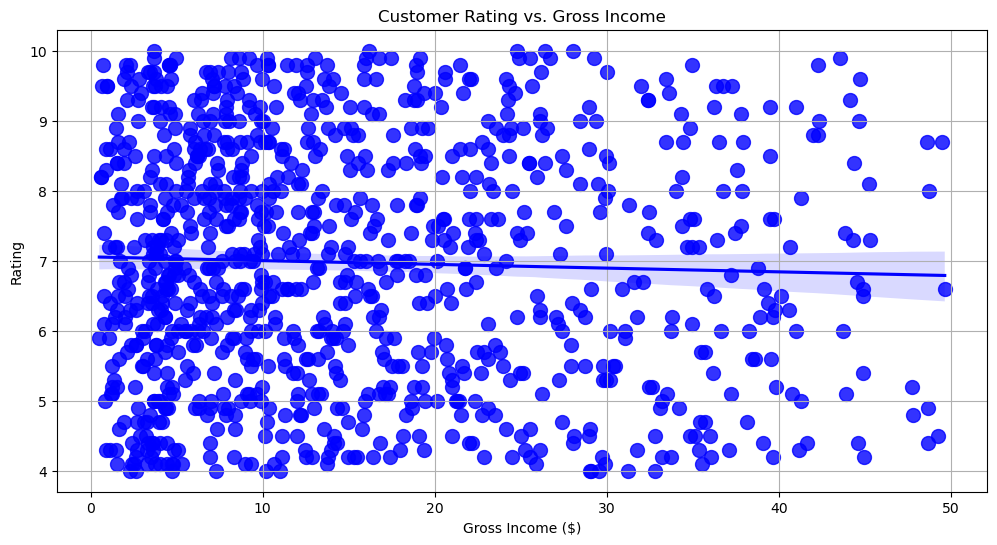

In [28]:
plt.figure(figsize=(12, 6))
sns.regplot(x='gross income', y='Rating', data=df, scatter_kws={'s': 100}, color='blue')
plt.title('Customer Rating vs. Gross Income')
plt.xlabel('Gross Income ($)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

## Visualization: Distribution of Satisfaction Levels

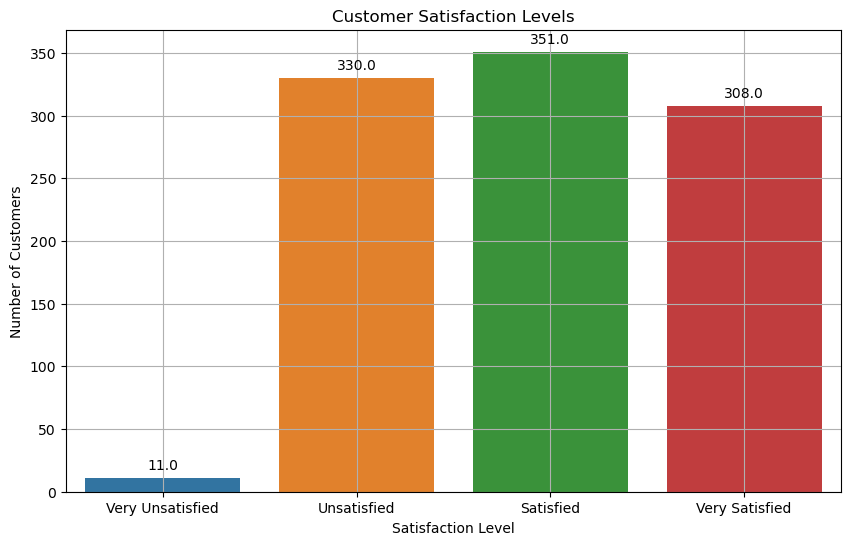

In [29]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Satisfaction Level', data=df, hue='Satisfaction Level',  order=labels, legend=False)

# Add count labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Customer Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Customers')
plt.grid(True)

# Show the plot
plt.show()

### Distribution of Gross Income Across Different Satisfaction Level

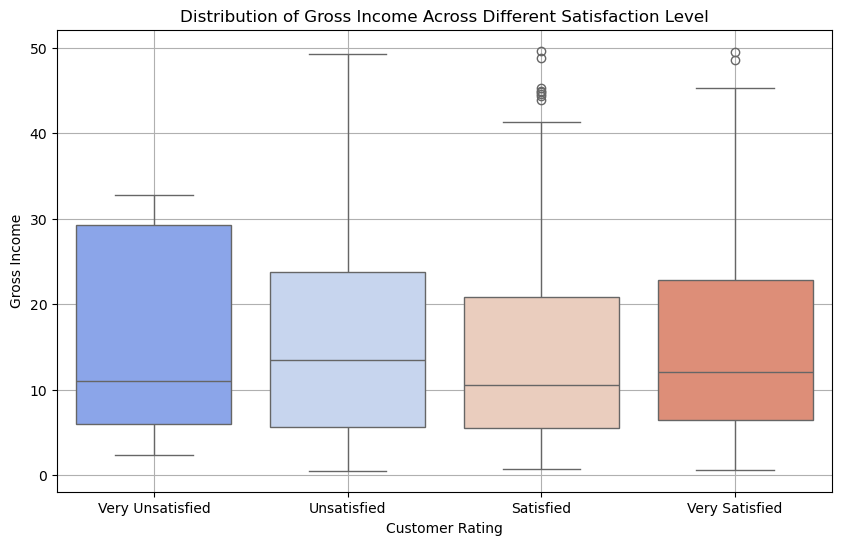

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Satisfaction Level', y='gross income', hue='Satisfaction Level',data=df, palette='coolwarm')

# Customize the plot
plt.title('Distribution of Gross Income Across Different Satisfaction Level')
plt.xlabel('Customer Rating')
plt.ylabel('Gross Income')
plt.grid(True)

# Show the plot
plt.show()


### Visualization: Payment Method vs. Satisfaction Level

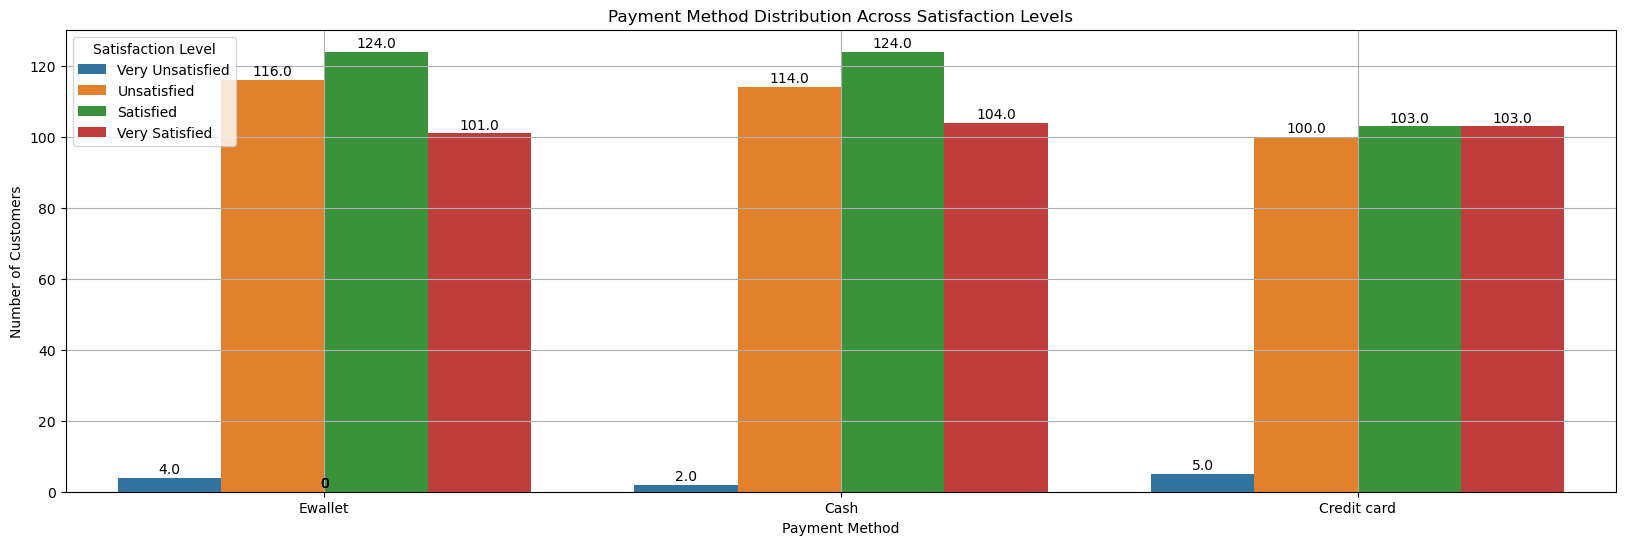

In [31]:
# Visualization: Payment Method vs. Satisfaction Level
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='Payment', hue='Satisfaction Level', data=df)

# Add count labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 6), textcoords='offset points')

# Customize the plot
plt.title('Payment Method Distribution Across Satisfaction Levels')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.legend(title='Satisfaction Level')

# Show the plot
plt.show()

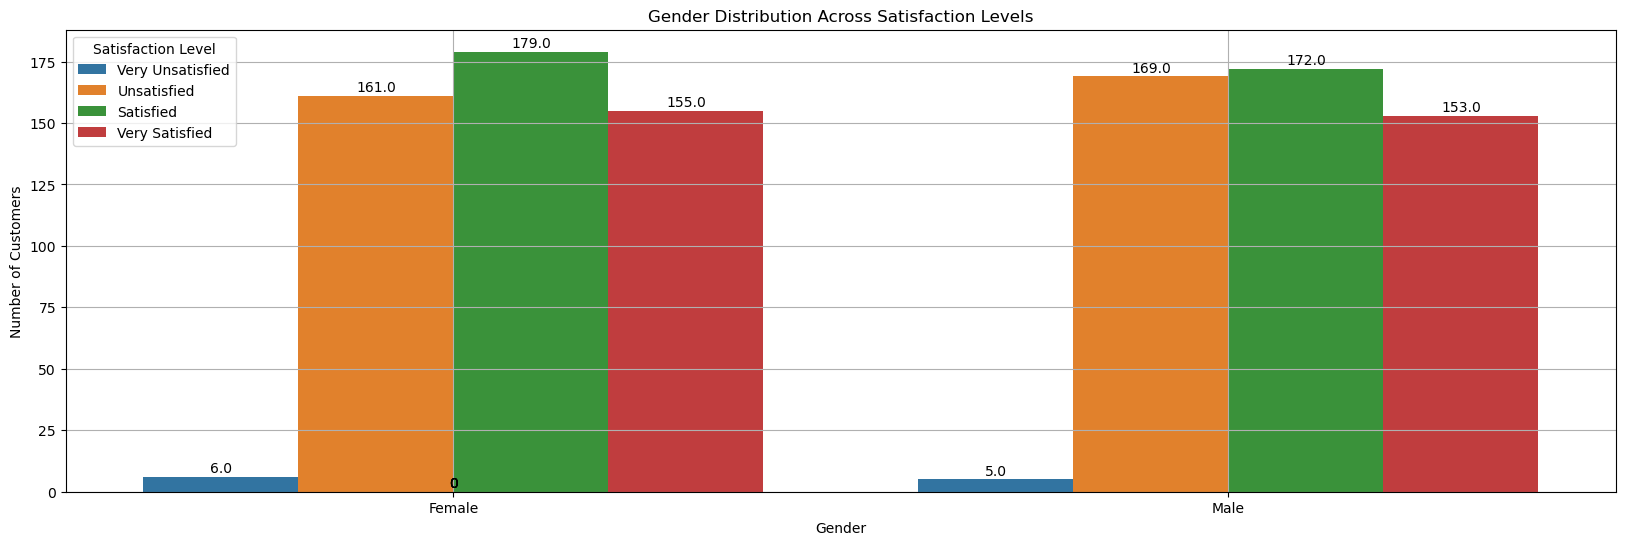

In [32]:
# Visualization: Gender vs. Satisfaction Level
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='Gender', hue='Satisfaction Level', data=df)

# Add count labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 6), textcoords='offset points')

# Customize the plot
plt.title('Gender Distribution Across Satisfaction Levels')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.legend(title='Satisfaction Level')

# Show the plot
plt.show()

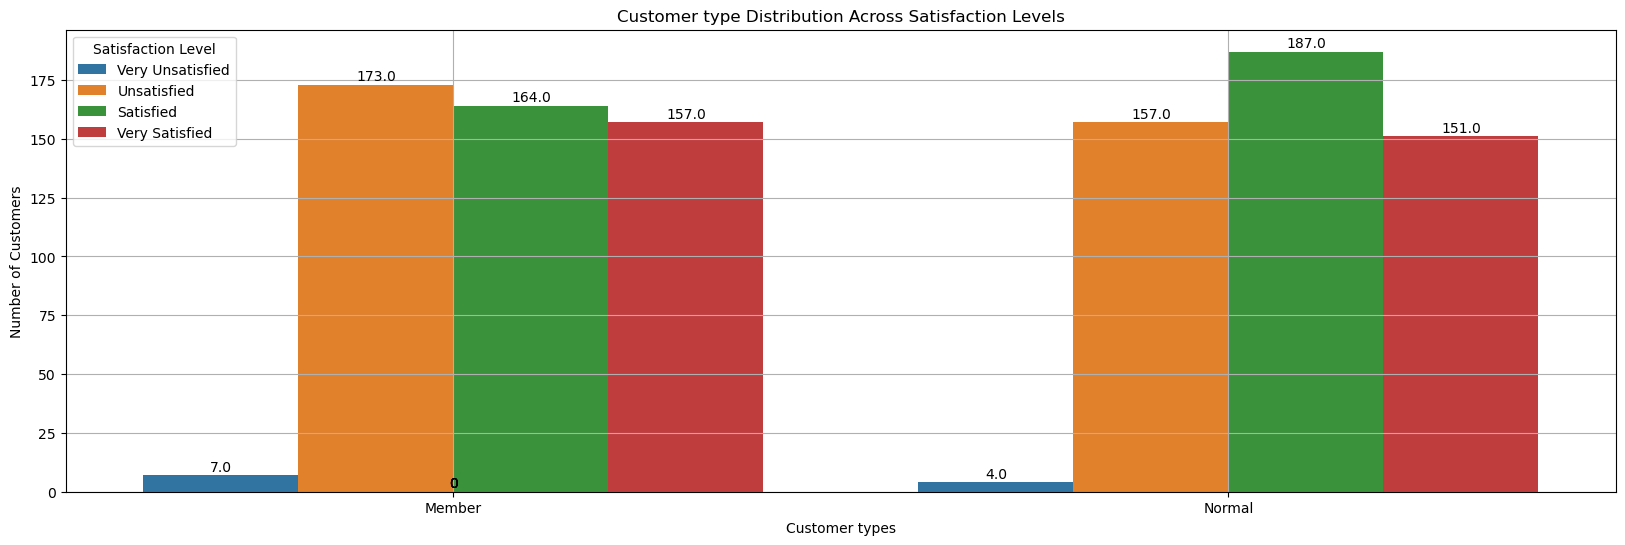

In [33]:
# Visualization: Payment Method vs. Satisfaction Level
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='Customer type', hue='Satisfaction Level', data=df)

# Add count labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 6), textcoords='offset points')

# Customize the plot
plt.title('Customer type Distribution Across Satisfaction Levels')
plt.xlabel('Customer types')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.legend(title='Satisfaction Level')

# Show the plot
plt.show()

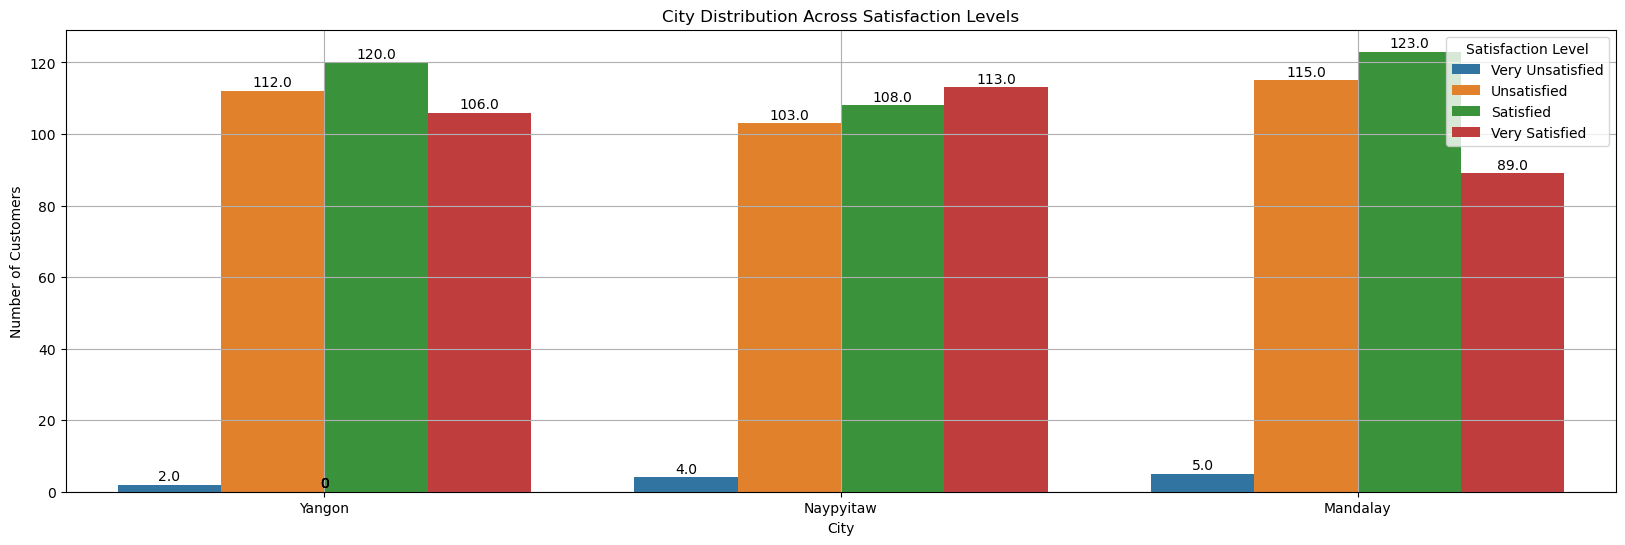

In [34]:
# Visualization: Payment Method vs. Satisfaction Level
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='City', hue='Satisfaction Level', data=df)

# Add count labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 6), textcoords='offset points')

# Customize the plot
plt.title('City Distribution Across Satisfaction Levels')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.legend(title='Satisfaction Level')

# Show the plot
plt.show()

## Visualization: Branch vs. Satisfaction Level

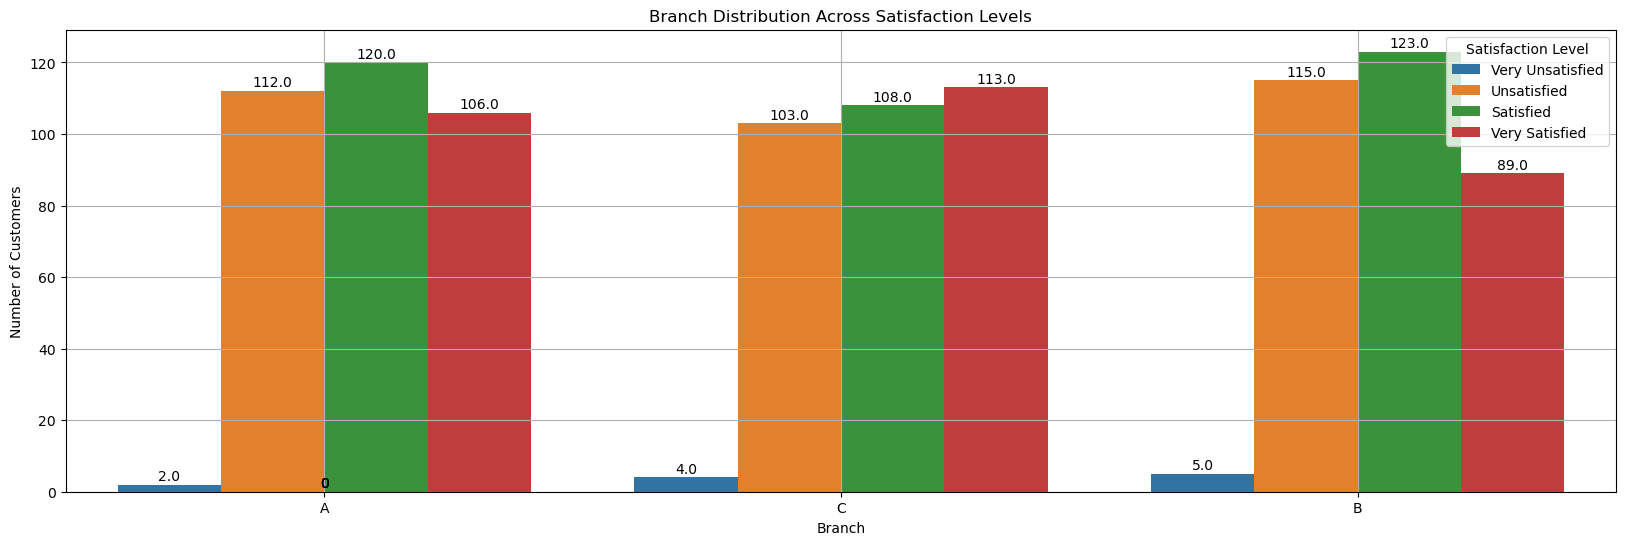

In [35]:
# Visualization: Branch vs. Satisfaction Level
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='Branch', hue='Satisfaction Level', data=df)

# Add count labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 6), textcoords='offset points')

# Customize the plot
plt.title('Branch Distribution Across Satisfaction Levels')
plt.xlabel('Branch')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.legend(title='Satisfaction Level')

# Show the plot
plt.show()

### Visualization: Unit Price vs. Satisfaction Level


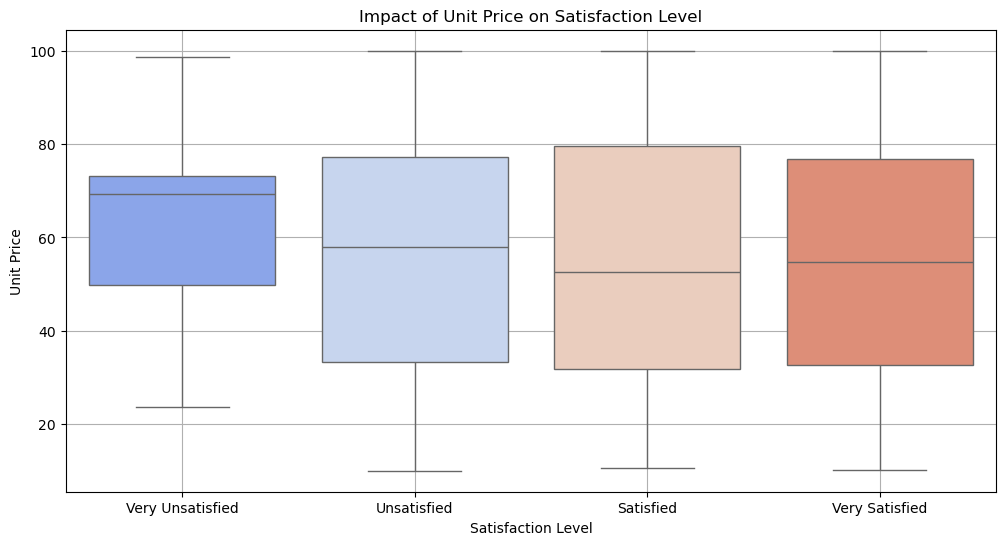

In [36]:
# Visualization: Unit Price vs. Satisfaction Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='Satisfaction Level', y='Unit price', hue='Satisfaction Level', legend=False,data=df, palette='coolwarm')

# Customize the plot
plt.title('Impact of Unit Price on Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Unit Price')
plt.grid(True)

# Show the plot
plt.show()

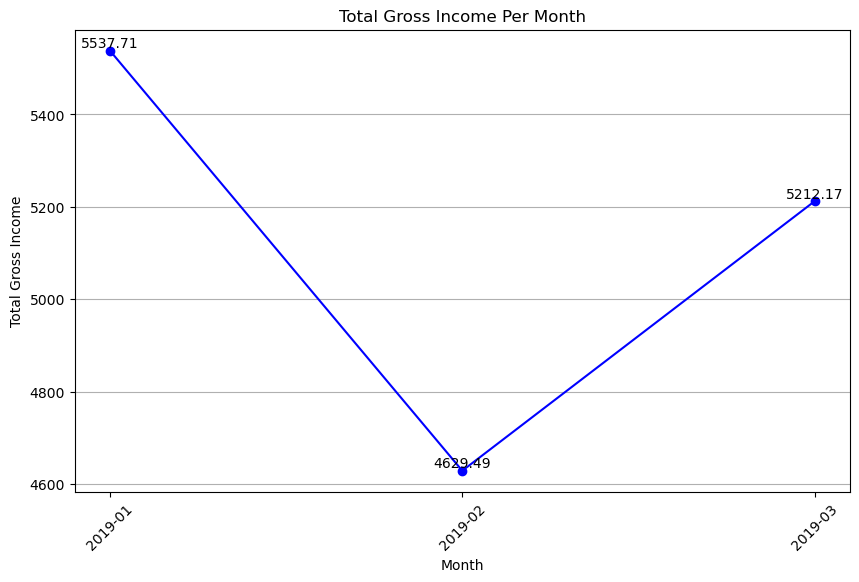

In [37]:
# Group by month and calculate the total gross income for each month
monthly_gross_income = df.groupby('Month')['gross income'].sum().reset_index()

# Plotting the gross income per month using a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_gross_income['Month'].astype(str), monthly_gross_income['gross income'], marker='o', color='b')

# Add exact value labels at each point
for i, value in enumerate(monthly_gross_income['gross income']):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom')

# Customize the plot
plt.title('Total Gross Income Per Month')
plt.xlabel('Month')
plt.ylabel('Total Gross Income')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

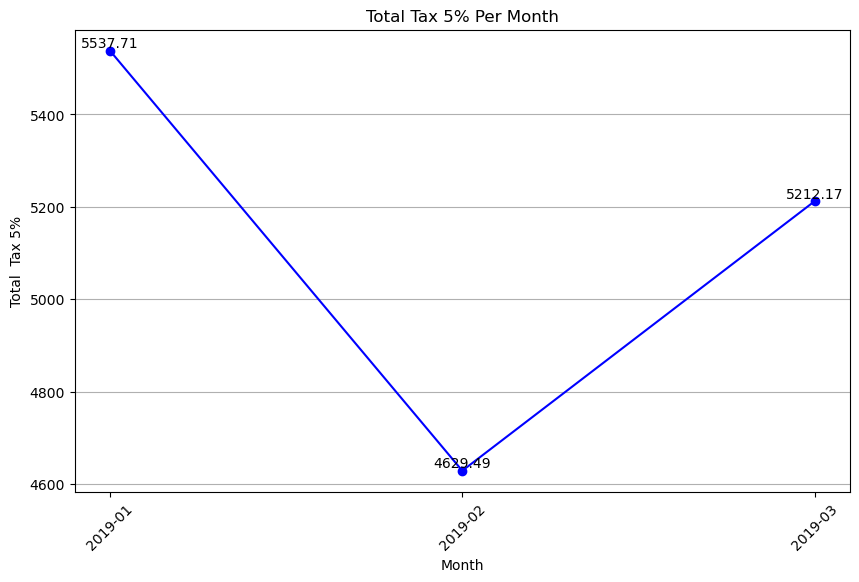

In [38]:
# Group by month and calculate the total gross income for each month
monthly_Tax_5 = df.groupby('Month')['Tax 5%'].sum().reset_index()

# Plotting the gross income per month using a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_Tax_5['Month'].astype(str), monthly_Tax_5['Tax 5%'], marker='o', color='b')

# Add exact value labels at each point
for i, value in enumerate(monthly_Tax_5['Tax 5%']):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom')

# Customize the plot
plt.title('Total Tax 5% Per Month')
plt.xlabel('Month')
plt.ylabel('Total  Tax 5%')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

In [40]:
# Calculate the total gross income across all months
total_gross_income = monthly_gross_income['gross income'].sum()

# Calculate the percentage of total gross income for each month
monthly_gross_income['Percentage'] = (monthly_gross_income['gross income'] / total_gross_income) * 100

# Display the result
print(monthly_gross_income)



     Month  gross income  Percentage
0  2019-01      5537.708   36.007381
1  2019-02      4629.494   30.101976
2  2019-03      5212.167   33.890643


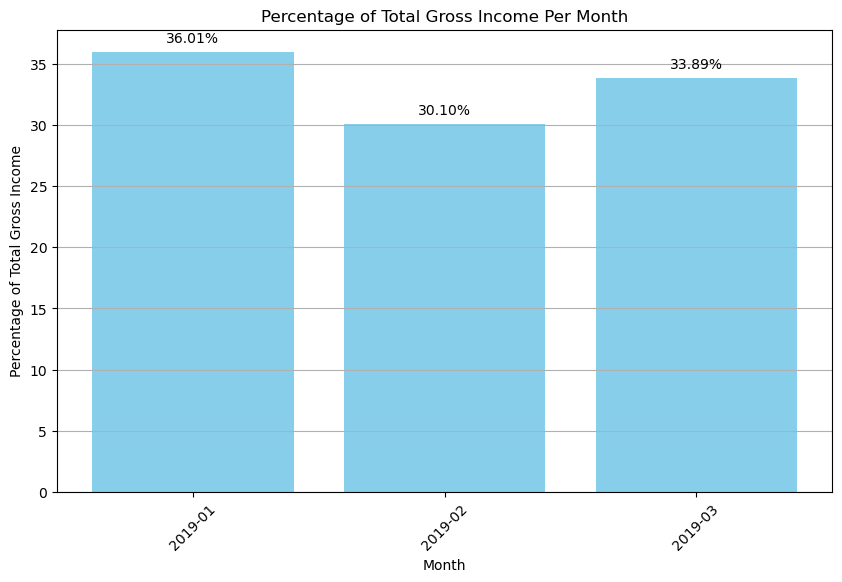

In [41]:
#  Plot the percentage contribution of each month's gross income

plt.figure(figsize=(10, 6))
plt.bar(monthly_gross_income['Month'].astype(str), monthly_gross_income['Percentage'], color='skyblue')

# Add percentage labels on the bars
for i, value in enumerate(monthly_gross_income['Percentage']):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

# Customize the plot
plt.title('Percentage of Total Gross Income Per Month')
plt.xlabel('Month')
plt.ylabel('Percentage of Total Gross Income')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()